<h1 style="color: red;">II- Data Preparation</h1>

<h2 style="color: green;">1- Import Python Modules and Dataset </h2>

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('bank.csv')

# Display basic information
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB
None


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


<h2 style="color: green;">2-Process and Encode the Categorical Features</h2>

In [208]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns.tolist())

Categorical Columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [209]:
# Delete not useful information
# Define columns to drop
columns_to_drop = ['subscribed', 'day', 'month', 'duration', 'poutcome', 'pdays']

# Drop columns directly from df
df = df.drop(columns=columns_to_drop)

# Display the updated dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1988 non-null   float64
 1   job        1990 non-null   object 
 2   marital    2000 non-null   object 
 3   education  1896 non-null   object 
 4   default    2000 non-null   object 
 5   balance    2000 non-null   int64  
 6   housing    2000 non-null   object 
 7   loan       2000 non-null   object 
 8   contact    1809 non-null   object 
 9   campaign   2000 non-null   int64  
 10  previous   2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB
None


,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,2,2
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,2,1
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,2,1
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,2
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,1


## Why These Columns Were Removed?

1. **Target Variable (`subscribed`)**: Since we are performing clustering (an unsupervised learning technique), we do not need the target variable used in classification.  
   - Keeping `subscribed` would bias the clustering, making it act more like classification instead of discovering natural customer segments.  

2. **Day and Month (`day`, `month`)**: The exact day and month of contact are unlikely to contribute to meaningful customer segmentation.  

3. **Call Duration (`duration`)**: This feature is highly correlated with whether a customer subscribes or not, making it unsuitable for clustering.  

4. **Previous Outcome (`poutcome`)**: A significant portion of the values are missing, making it unreliable for clustering.  

5. **Days Since Last Contact (`pdays`)**: Many values are set to `-1`, meaning "never contacted before," leading to skewed clustering results.  

By removing these columns, we ensure that the clustering algorithm focuses on meaningful patterns in the data.



## Encoding Ordinal Categorical Attributes

Ordinal categorical attributes have a meaningful order, so we need to convert them into numerical values while preserving their rank.

### **Why Encode Ordinal Attributes?**
1. Machine learning algorithms require numerical input.
2. Some categorical variables have an inherent order (e.g., education level).
3. Encoding preserves relationships between categories.

### **Ordinal Attributes Identified**
We identified the following ordinal features:
- **Education**:  
  - `"primary" < "secondary" < "tertiary"` → Encoded as `1, 2, 3`
- **Default (Credit Default)**, **Housing (Has Housing Loan?)**, **Loan (Has Personal Loan?)**:  
  - Binary (`"yes" = 1`, `"no" = 0`)

### **Why Not Encode Other Categorical Features as Ordinal?**
- **Marital Status (`marital`)**: No natural order → **One-Hot Encoding will be used later.**
- **Job (`job`)**: No meaningful ranking between jobs → **One-Hot Encoding or Label Encoding needed.**
- **Contact (`contact`)**: `"cellular"` vs `"telephone"` has no rank → One-Hot Encoding preferred.

Now that ordinal attributes are encoded, we will proceed to encoding **nominal categorical attributes** next. 🚀



In [212]:
# Define mappings for ordinal categorical columns
education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3}
binary_mapping = {'no': 0, 'yes': 1}

# Apply mappings
df['education'] = df['education'].map(education_mapping)
df['default'] = df['default'].map(binary_mapping)
df['housing'] = df['housing'].map(binary_mapping)
df['loan'] = df['loan'].map(binary_mapping)

# Display the transformed dataset
print(df[['education', 'default', 'housing', 'loan']].head(10))  # Check if encoding worked correctly
df.head()


   education  default  housing  loan
0        3.0        0        1     0
1        2.0        0        1     1
2        2.0        0        1     1
3        2.0        0        1     1
4        2.0        0        1     0
5        3.0        0        1     0
6        2.0        0        1     1
7        2.0        0        1     1
8        3.0        0        1     0
9        3.0        0        0     0


,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous
0,32.0,technician,single,3.0,0,392,1,0,cellular,2,2
1,39.0,technician,divorced,2.0,0,688,1,1,cellular,2,1
2,59.0,retired,married,2.0,0,1035,1,1,cellular,2,1
3,47.0,blue-collar,married,2.0,0,398,1,1,cellular,1,2
4,54.0,retired,married,2.0,0,1004,1,0,cellular,1,1


In [213]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,previous
1995,20.0,student,single,NaN,0,2785,0,0,cellular,2,0
1996,28.0,admin.,single,2.0,0,127,0,0,cellular,2,0
1997,81.0,retired,married,1.0,0,1154,0,0,telephone,1,0
1998,46.0,services,married,1.0,0,4343,1,0,NaN,1,0
1999,40.0,entrepreneur,married,2.0,0,6403,0,0,cellular,2,0


<h2 style="color: green;">3-Treatment of Missing Values in Numerical Columns</h2>

In [215]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Check for missing values in numerical columns
missing_values = df[numerical_columns].isna().sum()
missing_values = missing_values[missing_values > 0] 

# Display missing values count
print("Missing values in numerical columns:\n", missing_values)


Missing values in numerical columns:
 age           12
education    104
dtype: int64


Continuous Numerical Columns: ['age', 'education', 'balance', 'campaign', 'previous']


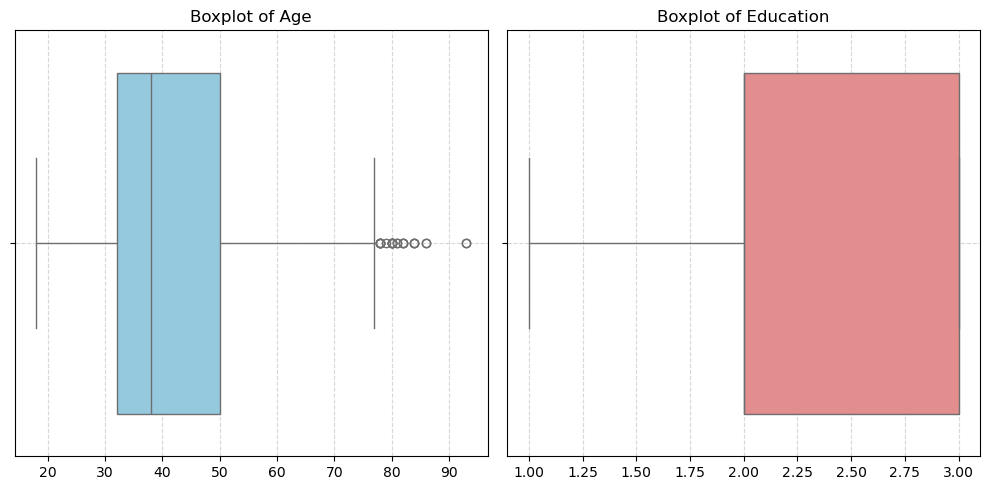

In [216]:
# Create boxplots for numerical columns

# Exclude binary columns (assuming they are 0/1 or boolean)
binary_columns = [col for col in numerical_columns if df[col].nunique() <= 2]
continuous_numerical_columns = [col for col in numerical_columns if col not in binary_columns]

print("Continuous Numerical Columns:", continuous_numerical_columns)

plt.figure(figsize=(10, 5))

# Plot Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df["age"], color="skyblue")
plt.title("Boxplot of Age", fontsize=12)
plt.xlabel("")
plt.grid(True, linestyle="--", alpha=0.5)

# Plot Boxplot for Education
plt.subplot(1, 2, 2)
sns.boxplot(x=df["education"], color="lightcoral")
plt.title("Boxplot of Education", fontsize=12)
plt.xlabel("")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


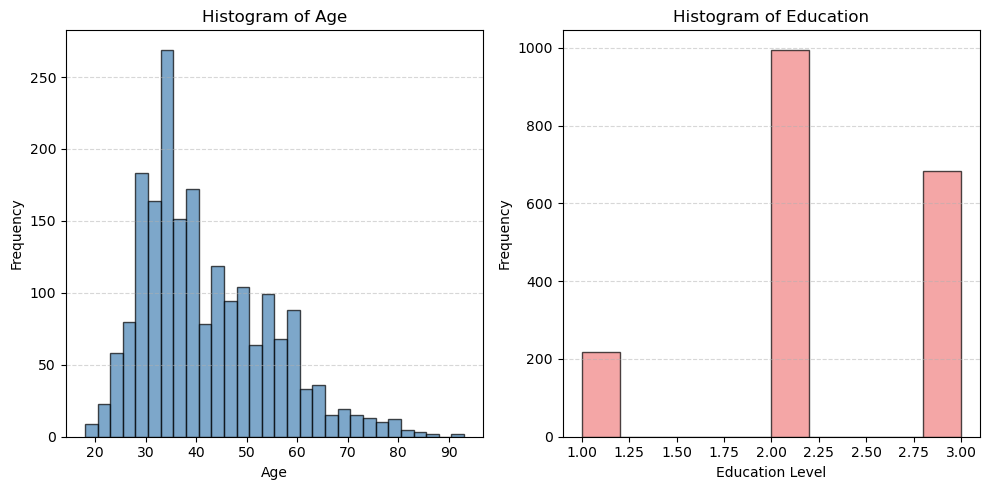

In [217]:
plt.figure(figsize=(10, 5))

# Plot Histogram for Age
plt.subplot(1, 2, 1)
plt.hist(df["age"].dropna(), bins=30, color="steelblue", alpha=0.7, edgecolor="black")
plt.title("Histogram of Age", fontsize=12)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Plot Histogram for Education
plt.subplot(1, 2, 2)
plt.hist(df["education"].dropna(), bins=10, color="lightcoral", alpha=0.7, edgecolor="black")
plt.title("Histogram of Education", fontsize=12)
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()



## **Handling Missing Values in Numerical Columns**

### **Why Handle Missing Values?**  
Missing values can lead to biased results, affect model performance, and reduce the quality of clustering.

### **Imputation Strategy:**
- **Age → Mean Imputation:**  
  - The histogram shows a **normal-like distribution** (bell-shaped).  
  - The mean represents the central tendency well.  
  - Preserves overall data structure without skewing results.

- **Education → Mode Imputation:**  
  - Education is **categorical** (discrete values: 1, 2, 3).  
  - The mode (most frequent value) is the best representative.  
  - Prevents introducing artificial values.




In [219]:
# Impute missing values for age & balance with the mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['balance'].fillna(df['balance'].mean(), inplace=True)

# Impute missing values for education with the mode (most frequent value)
df['education'].fillna(df['education'].mode()[0], inplace=True)

# Verify if there are still missing values
print("Missing values after imputation:\n", df[['age', 'education','balance']].isnull().sum())

Missing values after imputation:
 age          0
education    0
balance      0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_8848\2785469982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_8848\2785469982.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example


<h2 style="color: green;"> One-Hot Encoding for Categorical Columns</h2>

### **Why Apply One-Hot Encoding?**
1. K-Means clustering requires **numerical features** since it uses Euclidean distance.
2. One-Hot Encoding converts categorical variables into numerical **binary indicators**.
3. Avoids the incorrect assumption of **ordinal relationships** in non-ordered categories.

### **How We Encoded the Data**
- **`pd.get_dummies()`**: Converts categorical features into binary variables.
- **`dummy_na=True`**: Treats missing values as a separate category.
- **`drop_first=True`**: Removes one category to prevent the **dummy variable trap**.

### **Which Columns Were Encoded?**
We applied One-Hot Encoding to **all categorical columns**, ensuring:
✅ Proper numerical representation for clustering.  
✅ No artificial ordering in categorical variables.  
✅ Missing values are handled as a separate category.

Now, categorical variables are fully encoded and ready for K-Means clustering! 🚀


In [260]:
# Identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding to all categorical columns, not just those with NaNs
df = pd.get_dummies(df, columns=categorical_columns, dummy_na=True, drop_first=True)

# Convert boolean columns (True/False) to integers (0/1)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

# Display the transformed dataset
print(df.info())  
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int32  
 1   education          2000 non-null   int32  
 2   default            2000 non-null   int32  
 3   balance            2000 non-null   float64
 4   housing            2000 non-null   int32  
 5   loan               2000 non-null   int32  
 6   campaign           2000 non-null   float64
 7   previous           2000 non-null   float64
 8   job_blue-collar    2000 non-null   int32  
 9   job_entrepreneur   2000 non-null   int32  
 10  job_housemaid      2000 non-null   int32  
 11  job_management     2000 non-null   int32  
 12  job_retired        2000 non-null   int32  
 13  job_self-employed  2000 non-null   int32  
 14  job_services       2000 non-null   int32  
 15  job_student        2000 non-null   int32  
 16  job_technician     2000 

,age,education,default,balance,housing,loan,campaign,previous,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,marital_nan,contact_telephone,contact_nan
1995,20,2,0,7.932362,0,0,1.098612,0.0,0,0,...,0,1,0,0,0,0,1,0,0,0
1996,28,2,0,4.852030,0,0,1.098612,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1997,81,1,0,7.051856,0,0,0.693147,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1998,46,1,0,8.376551,1,0,0.693147,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1
1999,40,2,0,8.764678,0,0,1.098612,0.0,0,1,...,0,0,0,0,0,1,0,0,0,0


<h2 style="color: green;">4-Treatment of Outliers</h2>

In [223]:


# List of numerical columns (excluding binary ones)
binary_columns = [col for col in df.columns if df[col].nunique() <= 2]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns]

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_dict[col] = outliers
    
    return outliers_dict

# Detect outliers in numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

# Display results
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}: {len(outlier_values)} values")


Outliers in age: 24 values
Outliers in education: 0 values
Outliers in balance: 158 values
Outliers in campaign: 212 values
Outliers in previous: 169 values


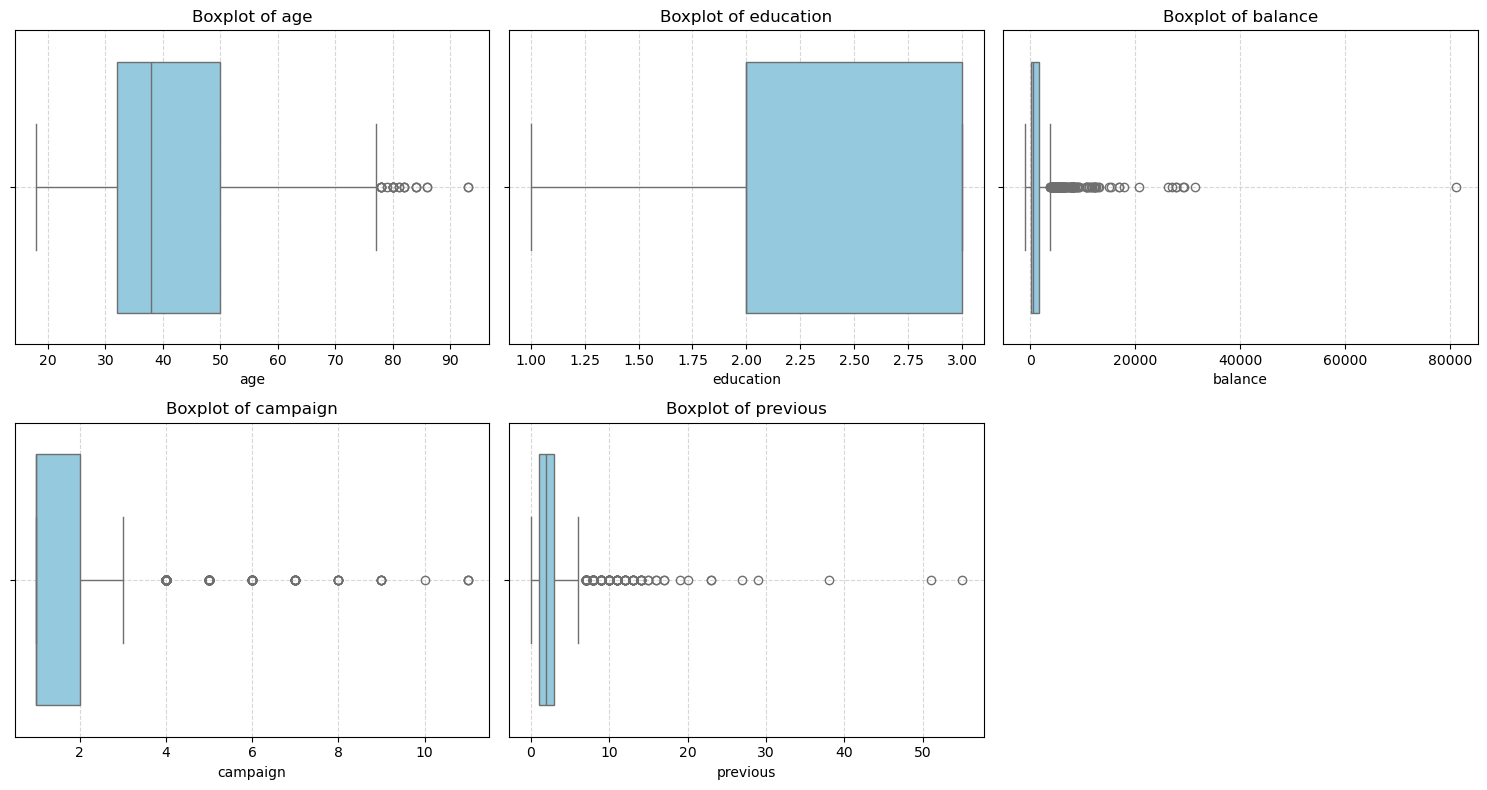

In [224]:
# Create boxplots for numerical columns (excluding binary)
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) // 2) + 1, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


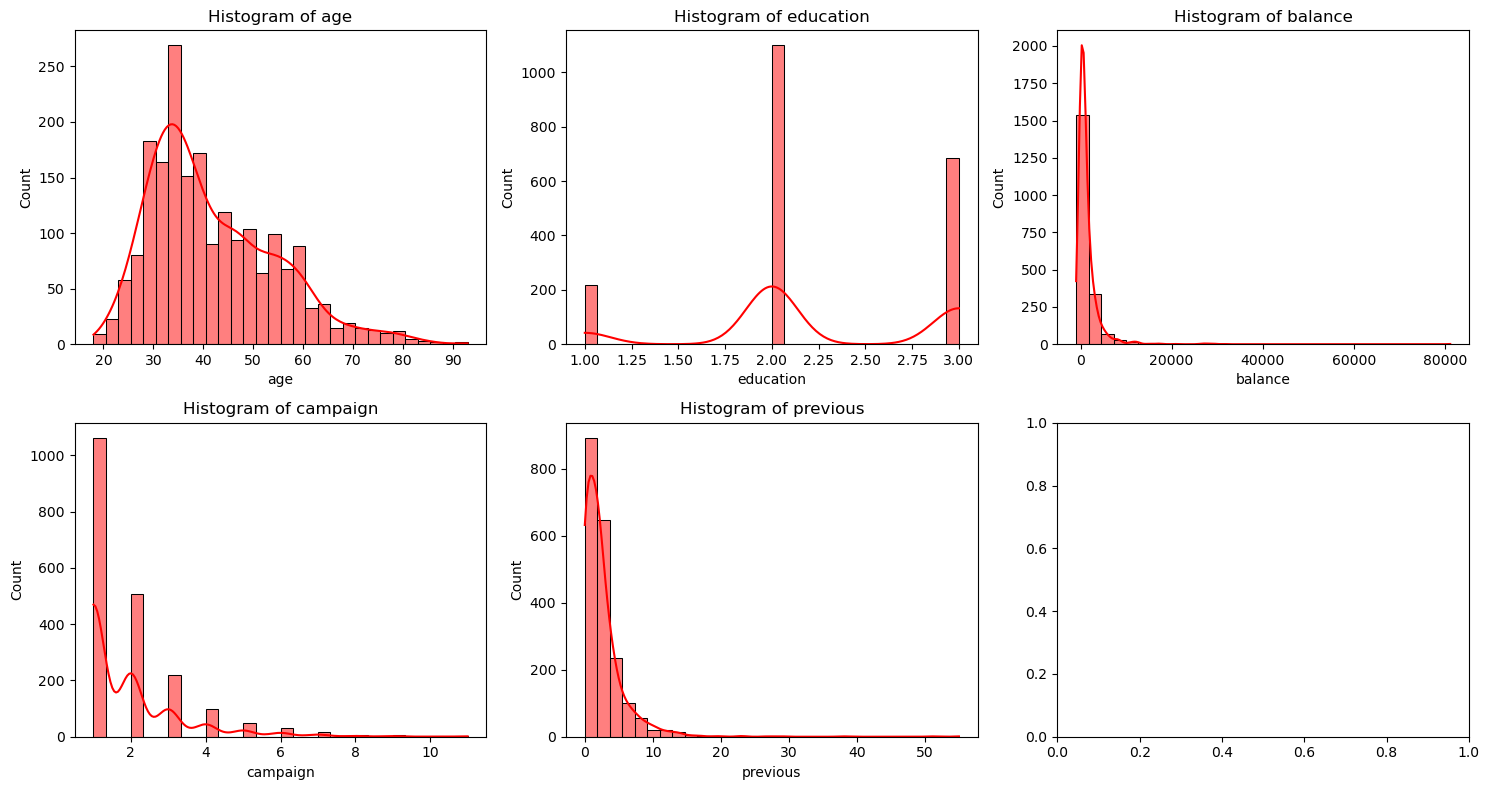

In [225]:
# Select only numerical columns (excluding binary/one-hot encoded)
numerical_columns = ["age", "education", "balance", "campaign", "previous"]  

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns) // 2 + 1, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="red")
    axes[i].set_title(f"Histogram of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

In [226]:
# Compute skewness
skewness_values = df[numerical_columns].skew()
print(skewness_values)

age           0.857532
education    -0.227373
balance      11.461564
campaign      2.320856
previous      5.461168
dtype: float64


## Why Use Skewness in Data Preprocessing?

Skewness measures the **asymmetry** of a dataset’s distribution. It helps decide whether a feature needs transformation for better clustering performance.

### 🔹 When to Apply Log Transformation?
- **Skewness > 1** → Highly right-skewed (Use `log(x + 1)`)
- **Skewness < -1** → Highly left-skewed (Consider Box-Cox or sqrt)
- **Skewness ≈ 0** → No transformation needed

In [228]:
# Apply log transformation to highly skewed features
df["balance"] = np.log1p(df["balance"])
df["campaign"] = np.log1p(df["campaign"])
df["previous"] = np.log1p(df["previous"])

D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


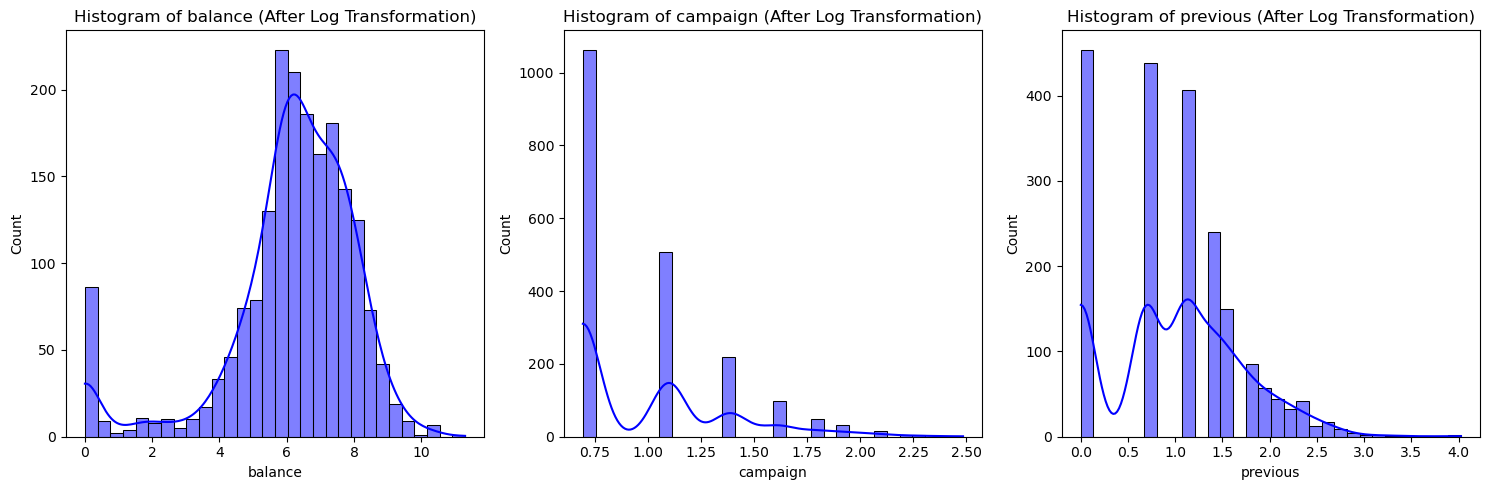

In [229]:
# Plot histograms to see the effect of log transformation
# List of transformed columns
transformed_columns = ["balance", "campaign", "previous"]
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop through transformed columns and plot histograms
for i, col in enumerate(transformed_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Histogram of {col} (After Log Transformation)")

plt.tight_layout()
plt.show()

<h2 style="color: green;">5-Rescaling Features</h2>

In [231]:
print(df.describe())

               age    education      default      balance      housing  \
count  2000.000000  2000.000000  2000.000000  1908.000000  2000.000000   
mean     41.748500     2.233500     0.007500         -inf     0.481500   
std      12.686241     0.629425     0.086299          NaN     0.499783   
min      18.000000     1.000000     0.000000         -inf     0.000000   
25%      32.000000     2.000000     0.000000     5.512419     0.000000   
50%      38.000000     2.000000     0.000000     6.394426     0.000000   
75%      50.000000     3.000000     0.000000     7.449789     1.000000   
max      93.000000     3.000000     1.000000    11.304732     1.000000   

              loan     campaign     previous  job_blue-collar  \
count  2000.000000  2000.000000  2000.000000      2000.000000   
mean      0.125000     0.987728     0.994569         0.149000   
std       0.330802     0.373391     0.718727         0.356178   
min       0.000000     0.693147     0.000000         0.000000   
25%     

C:\Users\dell\AppData\Local\Temp\ipykernel_8848\3747163593.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  # Rotate labels
C:\Users\dell\AppData\Local\Temp\ipykernel_8848\3747163593.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  # Rotate labels
C:\Users\dell\AppData\Local\Temp\ipykernel_8848\3747163593.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  # Rotate labels


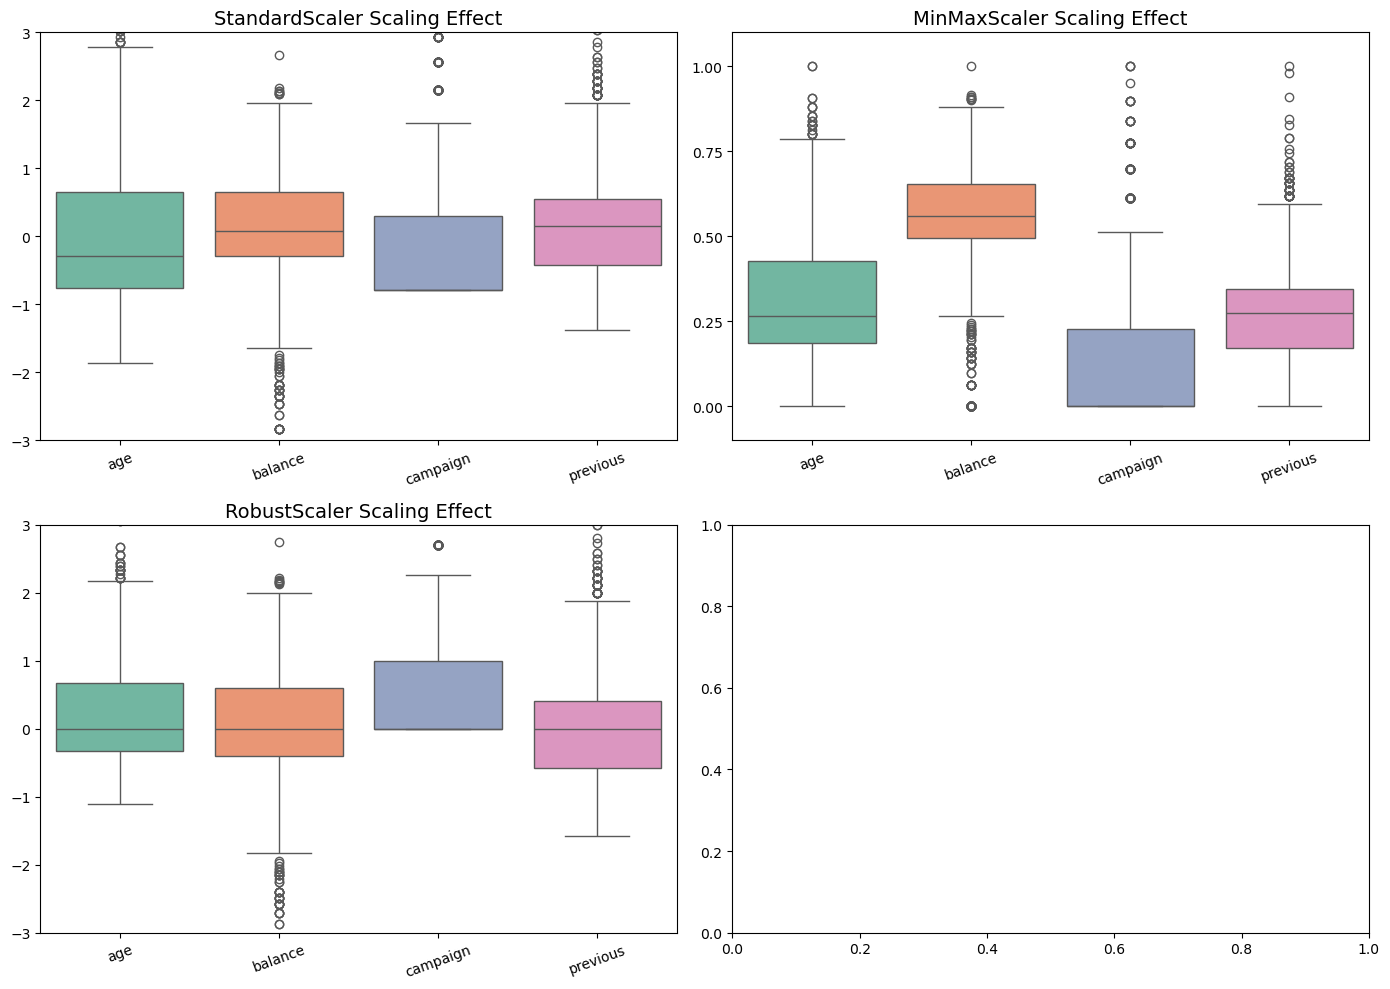

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Select numerical features to scale
numerical_columns = ["age", "balance", "campaign", "previous"]

# 🔹 1. Replace infinite values with NaN 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# 🔹 2. Fill NaN values with the column mean
df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.mean()))

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()


# Apply scaling and store results in a dictionary
scaled_df = {
    "StandardScaler": pd.DataFrame(scaler_standard.fit_transform(df[numerical_columns]), columns=numerical_columns),
    "MinMaxScaler": pd.DataFrame(scaler_minmax.fit_transform(df[numerical_columns]), columns=numerical_columns),
    "RobustScaler": pd.DataFrame(scaler_robust.fit_transform(df[numerical_columns]), columns=numerical_columns)
}


# Define the number of scalers
num_scalers = len(scaled_df)

# Create a grid layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust grid for better spacing
axes = axes.flatten()

# Set Y-axis limits (modify based on your data)
y_axis_limits = {
    "StandardScaler": (-3, 3),
    "MinMaxScaler": (-0.1, 1.1),
    "RobustScaler": (-3, 3)
}

# Plot each scaling effect
for ax, (name, data) in zip(axes, scaled_df.items()):
    sns.boxplot(data=data, ax=ax, palette="Set2")  # Use a color palette
    ax.set_title(f"{name} Scaling Effect", fontsize=14)  # Title formatting
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20)  # Rotate labels
    
    # Adjust Y-axis limits based on the scaler
    if name in y_axis_limits:
        ax.set_ylim(y_axis_limits[name])
    
    # Set Y-axis ticks dynamically
    ax.yaxis.set_major_locator(plt.MaxNLocator(6)) 

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<h2 style="color: green;">6-Save the Prepared Dataset in csv </h2>

## RobustScaler: Why Use It?

**RobustScaler** is a data scaling technique that is **resistant to outliers**. Unlike `StandardScaler`, it uses **median** and **interquartile range (IQR)** instead of mean and standard deviation.  

### ✅ **When to Use?**
- When the dataset contains **outliers**.
- When other scalers (like `StandardScaler`) get distorted by extreme values.

### 🚀 **Advantages**
- **More stable scaling** for skewed distributions.
- **Does not get affected by large outliers**.



# **Feature Scaling Choice for K-Means Clustering**

## **Why Scaling is Necessary?**
K-Means clustering is sensitive to differences in feature magnitudes. If features have different scales, those with larger values can dominate the clustering process, leading to biased clusters. To avoid this, we apply feature scaling.

## **Choice of Scaling Method: RobustScaler**
We use **RobustScaler** because:
- It **handles outliers** effectively by using the median and interquartile range (IQR), making it more robust than other scalers.
- It **preserves relative distances** between points, which is essential for clustering.
- Unlike MinMaxScaler or StandardScaler, it is less affected by extreme values, ensuring stable clusters.


In [235]:
from sklearn.preprocessing import RobustScaler

# Select numerical features
numerical_cols = ["age", "balance", "campaign", "previous"]

# Apply RobustScaler
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save to CSV
df_scaled.to_csv("bank_prepared_dataset.csv", index=False)
print("Dataset saved as bank_prepared_dataset.csv")

Dataset saved as bank_prepared_dataset.csv


In [236]:
df_scaled

,age,education,default,balance,housing,loan,campaign,previous,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,marital_nan,contact_telephone,contact_nan
0,-0.333333,3,0,-0.186721,1,0,1.0,0.000000,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.055556,2,0,0.121845,1,1,1.0,-0.584963,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.166667,2,0,0.346018,1,1,1.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.500000,2,0,-0.178394,1,1,0.0,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.888889,2,0,0.329321,1,0,0.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.000000,2,0,0.889709,0,0,1.0,-1.584963,0,0,...,0,1,0,0,0,0,1,0,0,0
1996,-0.555556,2,0,-0.803256,0,0,1.0,-1.584963,0,0,...,0,0,0,0,0,0,1,0,0,0
1997,2.388889,1,0,0.405778,0,0,0.0,-1.584963,0,0,...,0,0,0,0,0,1,0,0,1,0
1998,0.444444,1,0,1.133837,1,0,0.0,-1.584963,0,0,...,1,0,0,0,0,1,0,0,0,1
